In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind
import seaborn as sns


In [7]:
df = pd.read_csv('assessment_da25.csv')
df.head(3)

,Variant,Number of page views,GMV (in $),Number of add to cart,Clicks on media,Time on Page (sec),user_id
0,A,5,0.0,0,2,74,0
1,A,4,0.0,4,1,21,1
2,A,4,0.0,2,0,1,2


In [21]:
# Mean of the entire population
mean_population = df['GMV (in $)'].mean()

# Standard deviation of the entire population
std_population = df['GMV (in $)'].std()

print('Mean of the entire population:', mean_population)
print('Standard deviation of the entire population:', std_population)

Mean of the entire population: 8.489759999999999
Standard deviation of the entire population: 27.861281502218446


In [14]:
import pandas as pd
df = pd.DataFrame(data)
summary_stats = df.groupby('Variant').agg({
    'Number of page views': ['mean', 'std'],
    'GMV (in $)':['mean', 'std'],
    'Number of add to cart': ['mean', 'std'],
    'Clicks on media':['mean', 'std'],
    'Time on Page (sec)': ['mean', 'std'],
}).reset_index()

summary_stats

Variant Number of page views           GMV (in $)             \
                          mean       std       mean        std   
0       A                4.985  2.236465    7.68999  26.794816   
1       B                5.317  2.417096    9.28953  28.879687   

  Number of add to cart           Clicks on media            \
                   mean       std            mean       std   
0                 1.884  1.297778           1.495  1.230239   
1                 2.469  1.660662           1.324  1.180855   

  Time on Page (sec)             
                mean        std  
0             20.543  20.596076  
1             20.047  19.319784

In [19]:
#calculating the number of users in group A and B
n_A = df[(df['Variant']== 'A')]['GMV (in $)'].count()
n_B = df[(df['Variant']== 'B')]['GMV (in $)']. count()

print('the number of users in group A:', n_A)
print('the number of users in group B:', n_B)


the number of users in group A: 1000
the number of users in group B: 1000


In [28]:
from scipy.stats import ttest_ind

# Perform two-sample t-test
t_statistic, p_value = ttest_ind(df[df['Variant'] == 'A']['GMV (in $)'], 
                                  df[df['Variant'] == 'B']['GMV (in $)'],
                                  equal_var=False)  # Assuming unequal variances

# Print the results
print('t-statistic:', t_statistic)
print('p-value:', p_value)

# Compare p-value with significance level
alpha = 0.05  # Assuming a significance level of 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in GMV between Variant A and Variant B.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in GMV between Variant A and Variant B.")


t-statistic: -1.2839539769831623
p-value: 0.19930776178517312
Fail to reject the null hypothesis. There is no significant difference in GMV between Variant A and Variant B.


In [1]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

# Load the data
df = pd.read_csv('assessment_da25.csv')

# Separate the data into A and B groups
group_A = df[df['Variant'] == 'A']['Number of add to cart']
group_B = df[df['Variant'] == 'B']['Number of add to cart']

# Perform t-test
t_stat, p_value = ttest_ind(group_A, group_B, equal_var=False)

# Print the results
print("A/B Test Results:")
print("t-statistic:", t_stat)
print("p-value:", p_value)

# Check for statistical significance
alpha = 0.05
if p_value < alpha:
    print("Result is statistically significant. We reject the null hypothesis.")
else:
    print("Result is not statistically significant. We fail to reject the null hypothesis.")

A/B Test Results:
t-statistic: -8.777389396187948
p-value: 3.668898697938531e-18
Result is statistically significant. We reject the null hypothesis.


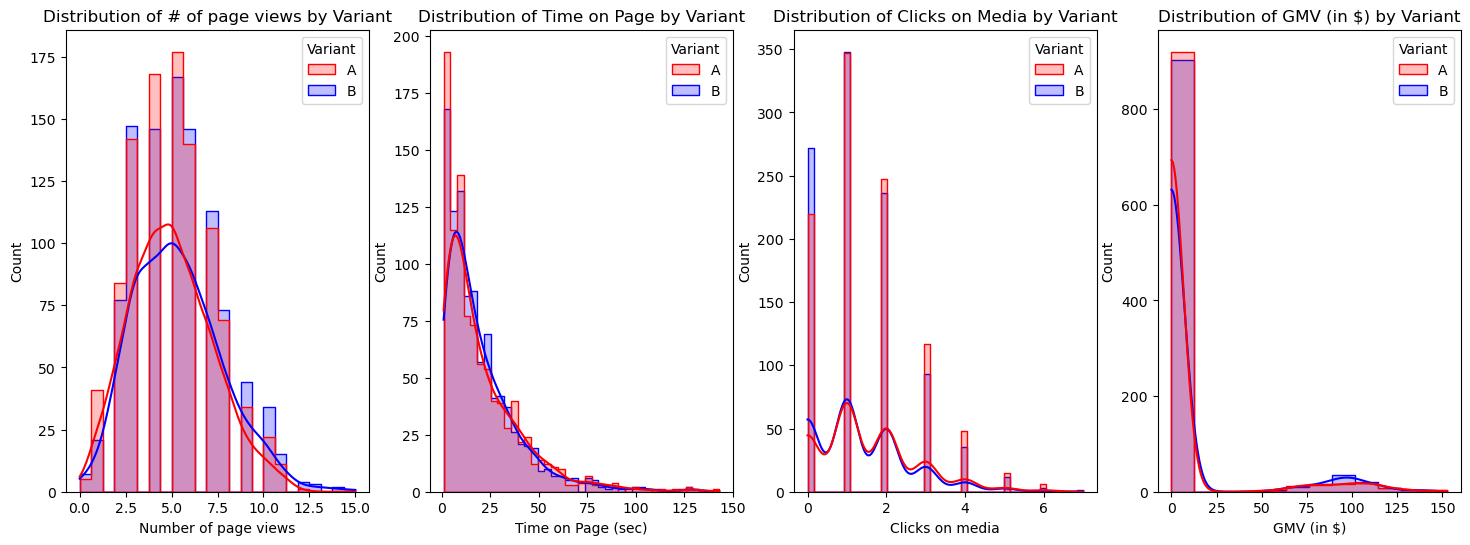

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the colors for group A and B
colors = {'A': 'red', 'B': 'blue'}

# Create subplots
fig, axes = plt.subplots(1, 4, figsize=(18, 6))

# Plot histograms for each variable
sns.histplot(data=data, x="Number of page views", hue="Variant", kde=True, ax=axes[0], element="step", palette=colors)
axes[0].set_title('Distribution of # of page views by Variant')

sns.histplot(data=data, x="Time on Page (sec)", hue="Variant", kde=True, ax=axes[1], element="step", palette=colors)
axes[1].set_title('Distribution of Time on Page by Variant')

sns.histplot(data=data, x="Clicks on media", hue="Variant", kde=True, ax=axes[2], element="step", palette=colors)
axes[2].set_title('Distribution of Clicks on Media by Variant')

sns.histplot(data=data, x="GMV (in $)", hue="Variant", kde=True, ax=axes[3], element="step", palette=colors)
axes[3].set_title('Distribution of GMV (in $) by Variant')

plt.show()